# Merging datasets

To move forward with the analysis we need to merge the datasets selected. 

In [5]:
# Import libs
import pandas as pd
import numpy as np

In [6]:
# Read database 1 and 2
clean_f1 = pd.read_csv("https://raw.githubusercontent.com/r41ss4/rennes_da/refs/heads/main/clean_dataf1.csv")
clean_f2 = pd.read_csv("https://raw.githubusercontent.com/r41ss4/rennes_da/refs/heads/main/clean_dataf2.csv")

In [7]:
# Review dataset
clean_f1.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Airline,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
# Review dataset
clean_f2.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [9]:
# Normalice names in common columns among datasets
clean_f1 = clean_f1.rename(columns={'Airline': 'airline', 'Price': 'price', 
                                    'Destination': 'destination_city', 'Source': 'source_city',
                                    'Duration': 'duration',  'Total_Stops': 'specific_stops'})
# Review dataset
clean_f1.head(5)

,airline,Date_of_Journey,source_city,destination_city,Route,Dep_Time,Arrival_Time,duration,specific_stops,Additional_Info,price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Airline,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
# Review how to normalice stops ('specific_stops') column
clean_f1['specific_stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [11]:
# Review how to normalice stops column
clean_f2['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

### Normalizing 'stops' column
#### Two columns and mode
This column has different possible values in both datasets, in clean_f2 it can only be 'zero', 'one', 'two_or_more', while in clean_f1 it can be 'non-stop', '2 stops', '1 stop', '3 stops', '4 stops'. It is forcing both columns to completely match means either altering the values of clean_f2 with the mode or losing details from clean_f1. Therefore, it is possible to conserve both by creating two columns, 'specific_stops' and 'general_stops'. 
The idea is to keep the specific stops from clean_f1 while filling the missing info with the mode in the column 'specific_stops', while all rows with values equal to '2 stops', '3 stops' or '4 stops' in clean_f1 will get the value of 'two_or_more' in the column 'general_stops'

In [12]:
# Create general_stops column in clean_f1
clean_f1['general_stops'] = clean_f1['specific_stops'].replace({
    'non-stop': 'zero',
    '1 stop': 'one',
    '2 stops': 'two_or_more',
    '3 stops': 'two_or_more',
    '4 stops': 'two_or_more'
})

In [13]:
# Review dataset
clean_f1.head(5)

,airline,Date_of_Journey,source_city,destination_city,Route,Dep_Time,Arrival_Time,duration,specific_stops,Additional_Info,price,general_stops
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,zero
1,Airline,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,two_or_more
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,two_or_more
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,one
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,one


In [14]:
# Correct clean_f2 column name
clean_f2 = clean_f2.rename(columns={'stops': 'general_stops'})
# Review dataset
clean_f2.head(5)

,airline,flight,source_city,departure_time,general_stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [15]:
# Create a new column specific_stops in clean_f2
clean_f2['specific_stops'] = clean_f2['general_stops']
# Review dataset
clean_f2.head(5)

,airline,flight,source_city,departure_time,general_stops,arrival_time,destination_city,class,duration,days_left,price,specific_stops
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,zero
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,zero
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,zero
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,zero
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,zero


In [16]:
# Calculate the mode of specific stops for each route in clean_f1
mode_stops = clean_f1.groupby(['source_city', 'destination_city'])['specific_stops'].agg(lambda x: x.mode().iloc[0])
mode_stops

source_city  destination_city
Banglore     Delhi               non-stop
             New Delhi             1 stop
Chennai      Kolkata             non-stop
Delhi        Cochin                1 stop
Kolkata      Banglore              1 stop
Mumbai       Hyderabad           non-stop
Name: specific_stops, dtype: object

In [17]:
# Review how to normalice stops column
clean_f2['specific_stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [18]:
# Function to get the mode of specific stops for a given route
def get_mode_specific_stops(row):
    route = (row['source_city'], row['destination_city'])
    if route in mode_stops.index:
        return mode_stops[route]
    else:
        return '2 stops'  # Default value if no mode is found

In [19]:
# Apply the function to replace two_or_more with the mode from clean_f1
clean_f2['specific_stops'] = clean_f2.apply(lambda row: get_mode_specific_stops(row) 
    if row['specific_stops'] == 'two_or_more' else row['specific_stops'].replace({
    'zero': 'non-stop',
    'one': '1 stop'
}), axis=1)
clean_f2

TypeError: replace expected at least 2 arguments, got 1

#### Problems with stops and mode
As the error shown above and that the mode_stops has no values different from non-stop and 1 stop, it reflex that there are no relevant flights reflected in clean_f2 with greater value mode different that 'non-stop' and '1 stop', which means it is un necessary to use the mode to fulfill specific_stops in clean_f2. 

In [20]:
clean_f2['specific_stops'] = clean_f2['specific_stops'].replace({
    'zero': 'non-stop',
    'one': '1 stop',
    'two_or_more': '2 stops'  # Default to 2 stops for simplicity
})
clean_f2

,airline,flight,source_city,departure_time,general_stops,arrival_time,destination_city,class,duration,days_left,price,specific_stops
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,non-stop
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,non-stop
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,non-stop
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,non-stop
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,non-stop
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,1 stop
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,1 stop
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,1 stop
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,1 stop


In [21]:
# Review how to normalice stops column
clean_f2['specific_stops'].unique()

array(['non-stop', '1 stop', '2 stops'], dtype=object)

### Normalizing 'duration' column
This column in clean_f1 is set as an object, having hours with h and minutes with m, while in clean_f2 it is a float numbers, where the decimals represent the minutes. Therefore, it is more practical to change the duration in clean_f1 into a similar format to clean_f2 

In [22]:
# Modify duration in clean
clean_f1['duration'] = clean_f1['duration'].str.replace('h ', '.')
clean_f1['duration'] = clean_f1['duration'].str.replace('h', '')
clean_f1['duration'] = clean_f1['duration'].str.replace('m', '')
# Review changes 
clean_f1.head(10)

,airline,Date_of_Journey,source_city,destination_city,Route,Dep_Time,Arrival_Time,duration,specific_stops,Additional_Info,price,general_stops
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2.50,non-stop,No info,3897,zero
1,Airline,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7.25,2 stops,No info,7662,two_or_more
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19,2 stops,No info,13882,two_or_more
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5.25,1 stop,No info,6218,one
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4.45,1 stop,No info,13302,one
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2.25,non-stop,No info,3873,zero
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,18:55,10:25 13 Mar,15.30,1 stop,In-flight meal not included,11087,one
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:00,05:05 02 Mar,21.5,1 stop,No info,22270,one
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:55,10:25 13 Mar,25.30,1 stop,In-flight meal not included,11087,one
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL ? BOM ? COK,11:25,19:15,7.50,1 stop,No info,8625,one


In [23]:
# Turn duration into float
clean_f1['duration'] = clean_f1['duration'].astype(float)

In [24]:
# Rewiew changes
clean_f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11751 entries, 0 to 11750
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           11751 non-null  object 
 1   Date_of_Journey   11751 non-null  object 
 2   source_city       11751 non-null  object 
 3   destination_city  11751 non-null  object 
 4   Route             11751 non-null  object 
 5   Dep_Time          11751 non-null  object 
 6   Arrival_Time      11751 non-null  object 
 7   duration          11751 non-null  float64
 8   specific_stops    11751 non-null  object 
 9   Additional_Info   11751 non-null  object 
 10  price             11751 non-null  int64  
 11  general_stops     11751 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.1+ MB


### Normalizing 'Dep_Time' column

In [25]:
# Function to categorize time into time of day
def categorize_dep(time):
    # Split the time string to get the hour part
    hour = int(time.split(':')[0])
    
    # Categorize the hour into time of day
    if 0 <= hour < 6:
        return 'Early_Morning'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return time  # Return the original time if it doesn't match any category

In [26]:
# Apply the categorization to the 'Dep_Time' on clean_f1
clean_f1['Dep_Time'] = clean_f1['Dep_Time'].apply(categorize_dep)
# Review changes 
clean_f1.head(10)

,airline,Date_of_Journey,source_city,destination_city,Route,Dep_Time,Arrival_Time,duration,specific_stops,Additional_Info,price,general_stops
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,Evening,01:10 22 Mar,2.50,non-stop,No info,3897,zero
1,Airline,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,Early_Morning,13:15,7.25,2 stops,No info,7662,two_or_more
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,Morning,04:25 10 Jun,19.00,2 stops,No info,13882,two_or_more
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,Evening,23:30,5.25,1 stop,No info,6218,one
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,Afternoon,21:35,4.45,1 stop,No info,13302,one
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU ? BLR,Morning,11:25,2.25,non-stop,No info,3873,zero
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,Evening,10:25 13 Mar,15.30,1 stop,In-flight meal not included,11087,one
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,Morning,05:05 02 Mar,21.50,1 stop,No info,22270,one
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,Morning,10:25 13 Mar,25.30,1 stop,In-flight meal not included,11087,one
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL ? BOM ? COK,Morning,19:15,7.50,1 stop,No info,8625,one


In [27]:
# Change name to match clean_f2 
clean_f1 = clean_f1.rename(columns={'Dep_Time': 'departure_time'})
# Review dataset
clean_f1.head(5)

,airline,Date_of_Journey,source_city,destination_city,Route,departure_time,Arrival_Time,duration,specific_stops,Additional_Info,price,general_stops
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,Evening,01:10 22 Mar,2.50,non-stop,No info,3897,zero
1,Airline,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,Early_Morning,13:15,7.25,2 stops,No info,7662,two_or_more
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,Morning,04:25 10 Jun,19.00,2 stops,No info,13882,two_or_more
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,Evening,23:30,5.25,1 stop,No info,6218,one
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,Afternoon,21:35,4.45,1 stop,No info,13302,one


### Normalizing 'Arrival_Time' column

In [28]:
# Function to categorize time into time of day and remove day and month information
def categorize_arriv(time):
    # Extract the time part (ignore the day and month if present)
    time_part = time.split()[0]
    hour = int(time_part.split(':')[0])
    
    # Categorize the hour into time of day
    if 0 <= hour < 6:
        return 'Early_Morning'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return time  # Return the original time if it doesn't match any category

In [29]:
# Apply the categorization to the 'Arrival_Time' column in df1
clean_f1['Arrival_Time'] = clean_f1['Arrival_Time'].apply(categorize_arriv)
# Review changes 
clean_f1.head(10)

,airline,Date_of_Journey,source_city,destination_city,Route,departure_time,Arrival_Time,duration,specific_stops,Additional_Info,price,general_stops
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,Evening,Early_Morning,2.50,non-stop,No info,3897,zero
1,Airline,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,Early_Morning,Afternoon,7.25,2 stops,No info,7662,two_or_more
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,Morning,Early_Morning,19.00,2 stops,No info,13882,two_or_more
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,Evening,Evening,5.25,1 stop,No info,6218,one
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,Afternoon,Evening,4.45,1 stop,No info,13302,one
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU ? BLR,Morning,Morning,2.25,non-stop,No info,3873,zero
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,Evening,Morning,15.30,1 stop,In-flight meal not included,11087,one
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,Morning,Early_Morning,21.50,1 stop,No info,22270,one
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,Morning,Morning,25.30,1 stop,In-flight meal not included,11087,one
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL ? BOM ? COK,Morning,Evening,7.50,1 stop,No info,8625,one


In [30]:
# Change name to match clean_f2 
clean_f1 = clean_f1.rename(columns={'Arrival_Time': 'arrival_time'})
# Review dataset
clean_f1.head(5)

,airline,Date_of_Journey,source_city,destination_city,Route,departure_time,arrival_time,duration,specific_stops,Additional_Info,price,general_stops
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,Evening,Early_Morning,2.50,non-stop,No info,3897,zero
1,Airline,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,Early_Morning,Afternoon,7.25,2 stops,No info,7662,two_or_more
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,Morning,Early_Morning,19.00,2 stops,No info,13882,two_or_more
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,Evening,Evening,5.25,1 stop,No info,6218,one
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,Afternoon,Evening,4.45,1 stop,No info,13302,one


### Normalizing 'Route' column
The column 'Route' from 'clean_f1' represents the different scales a trip could take, and it does not have any equivalent information in 'cleanf_f2'. Normally it could be considered the need to extract source_city and destination_cito from 'Route', but both columns are already available and similar in both datasets. 
Moreover, the 'Route' relevancy is correlated to the stops as if the route only has two cities there are non-stops. Since the details of the stops can not be provided of the datasets, there are only a few options left and the usefulness of the column is limited. Therefore, the column can be dropped. 

In [31]:
# Drop the 'Route' column from 'clean_f1'
clean_f1 = clean_f1.drop(columns=['Route'])

In [32]:
# Rewiew changes
clean_f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11751 entries, 0 to 11750
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           11751 non-null  object 
 1   Date_of_Journey   11751 non-null  object 
 2   source_city       11751 non-null  object 
 3   destination_city  11751 non-null  object 
 4   departure_time    11751 non-null  object 
 5   arrival_time      11751 non-null  object 
 6   duration          11751 non-null  float64
 7   specific_stops    11751 non-null  object 
 8   Additional_Info   11751 non-null  object 
 9   price             11751 non-null  int64  
 10  general_stops     11751 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1010.0+ KB


### Normalizing 'Additional_Info' column
In the dataset 'clean_f1', the column 'Additional_Info' has multiple values, among them 'No info' in the rows that lack additional information. In consequence, it makes sense to add a column with the same name in the dataset 'clean_f2' with the values 'No info'

In [33]:
# Change name in clean_f1 
clean_f1 = clean_f1.rename(columns={'Additional_Info': 'add_info'})
# Review dataset
clean_f1.head(5)

,airline,Date_of_Journey,source_city,destination_city,departure_time,arrival_time,duration,specific_stops,add_info,price,general_stops
0,IndiGo,24/03/2019,Banglore,New Delhi,Evening,Early_Morning,2.50,non-stop,No info,3897,zero
1,Airline,1/05/2019,Kolkata,Banglore,Early_Morning,Afternoon,7.25,2 stops,No info,7662,two_or_more
2,Jet Airways,9/06/2019,Delhi,Cochin,Morning,Early_Morning,19.00,2 stops,No info,13882,two_or_more
3,IndiGo,12/05/2019,Kolkata,Banglore,Evening,Evening,5.25,1 stop,No info,6218,one
4,IndiGo,01/03/2019,Banglore,New Delhi,Afternoon,Evening,4.45,1 stop,No info,13302,one


In [34]:
# Create a column named 'Additional_Info' filled with the values 'No info' in 'clean_f2'
clean_f2['add_info'] = 'No info'
# Review dataset
clean_f2.head(5)

,airline,flight,source_city,departure_time,general_stops,arrival_time,destination_city,class,duration,days_left,price,specific_stops,add_info
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,non-stop,No info
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,non-stop,No info
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,non-stop,No info
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,non-stop,No info
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,non-stop,No info


### Normalizing 'class' column
In the dataset 'clean_f2', the column 'class' has multiple values. However, there is no similar column in 'clean_f1', even though it is a useful piece of information. Since another column ('add_info') has used the value 'No info', it is logical to use it in a new column in 'clean_f1' to avoid having to drop the column. 

In [35]:
# Change name in clean_f1 
clean_f1['class'] = 'No info'
# Review dataset
clean_f1.head(5)

,airline,Date_of_Journey,source_city,destination_city,departure_time,arrival_time,duration,specific_stops,add_info,price,general_stops,class
0,IndiGo,24/03/2019,Banglore,New Delhi,Evening,Early_Morning,2.50,non-stop,No info,3897,zero,No info
1,Airline,1/05/2019,Kolkata,Banglore,Early_Morning,Afternoon,7.25,2 stops,No info,7662,two_or_more,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,Morning,Early_Morning,19.00,2 stops,No info,13882,two_or_more,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,Evening,Evening,5.25,1 stop,No info,6218,one,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,Afternoon,Evening,4.45,1 stop,No info,13302,one,No info


### Normalizing 'Date_of_Journey', 'days_left' and 'flight' column
It is not possible to normalize these columns, as they are missing in one of the datasets, and using the mode would not make sense, since it would be taming with the information. Their information has been reviewed and it is not relevant for further analysis. Therefore, such columns will be drop. 

In [36]:
# Drop the 'Date_of_Journey' column
clean_f1 = clean_f1.drop(columns=['Date_of_Journey'])

In [37]:
# Drop the 'days_left' and 'flight' columns
clean_f2 = clean_f2.drop(columns=['days_left'])
clean_f2 = clean_f2.drop(columns=['flight'])

In [38]:
# Review dataset
clean_f1.head(5)

,airline,source_city,destination_city,departure_time,arrival_time,duration,specific_stops,add_info,price,general_stops,class
0,IndiGo,Banglore,New Delhi,Evening,Early_Morning,2.50,non-stop,No info,3897,zero,No info
1,Airline,Kolkata,Banglore,Early_Morning,Afternoon,7.25,2 stops,No info,7662,two_or_more,No info
2,Jet Airways,Delhi,Cochin,Morning,Early_Morning,19.00,2 stops,No info,13882,two_or_more,No info
3,IndiGo,Kolkata,Banglore,Evening,Evening,5.25,1 stop,No info,6218,one,No info
4,IndiGo,Banglore,New Delhi,Afternoon,Evening,4.45,1 stop,No info,13302,one,No info


In [39]:
# Review dataset
clean_f2.head(5)

,airline,source_city,departure_time,general_stops,arrival_time,destination_city,class,duration,price,specific_stops,add_info
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,5953,non-stop,No info
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,5953,non-stop,No info
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,5956,non-stop,No info
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,5955,non-stop,No info
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,5955,non-stop,No info


## Merge the Datasets
Finally, we can merge the datasets. Since some columns are only present in one of the datasets, we can use the combine_first method to merge them.

In [40]:
# Merge the datasets
merged_df = clean_f1.combine_first(clean_f2)

In [41]:
# Review dataset
merged_df.head(5)

,add_info,airline,arrival_time,class,departure_time,destination_city,duration,general_stops,price,source_city,specific_stops
0,No info,IndiGo,Early_Morning,No info,Evening,New Delhi,2.50,zero,3897,Banglore,non-stop
1,No info,Airline,Afternoon,No info,Early_Morning,Banglore,7.25,two_or_more,7662,Kolkata,2 stops
2,No info,Jet Airways,Early_Morning,No info,Morning,Cochin,19.00,two_or_more,13882,Delhi,2 stops
3,No info,IndiGo,Evening,No info,Evening,Banglore,5.25,one,6218,Kolkata,1 stop
4,No info,IndiGo,Evening,No info,Afternoon,New Delhi,4.45,one,13302,Banglore,1 stop


In [42]:
# Save the merged dataset to a new CSV file
merged_df.to_csv('merged_df.csv', index=False)

## EDA

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
flight_counts = merged_df.groupby('airline').size().reset_index(name='Flight_Count')
flight_counts

,airline,Flight_Count
0,Air Asia,304
1,Air India,1760
2,AirAsia,15257
3,Air_India,77908
4,Airline,1186
5,GO_FIRST,21319
6,GoAir,198
7,IndiGo,2020
8,Indigo,41114
9,Jet Airways,3801


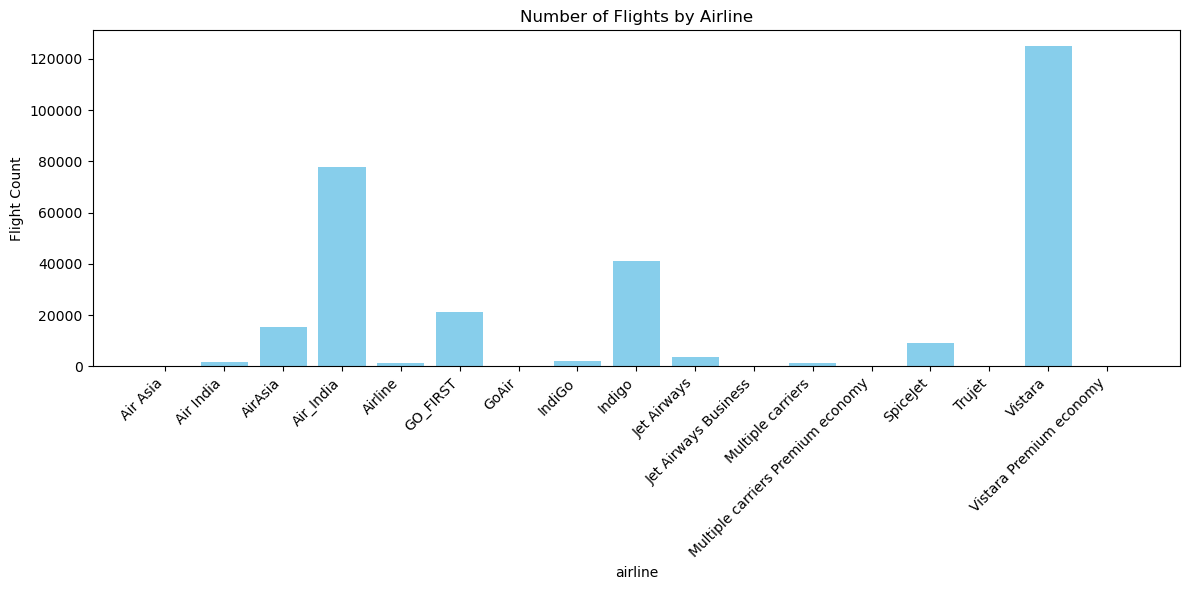

In [48]:
plt.figure(figsize=(12, 6))
plt.bar(flight_counts['airline'], flight_counts['Flight_Count'], color='skyblue')
plt.xlabel('airline')
plt.ylabel('Flight Count')
plt.title('Number of Flights by Airline')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout for readability
plt.show()

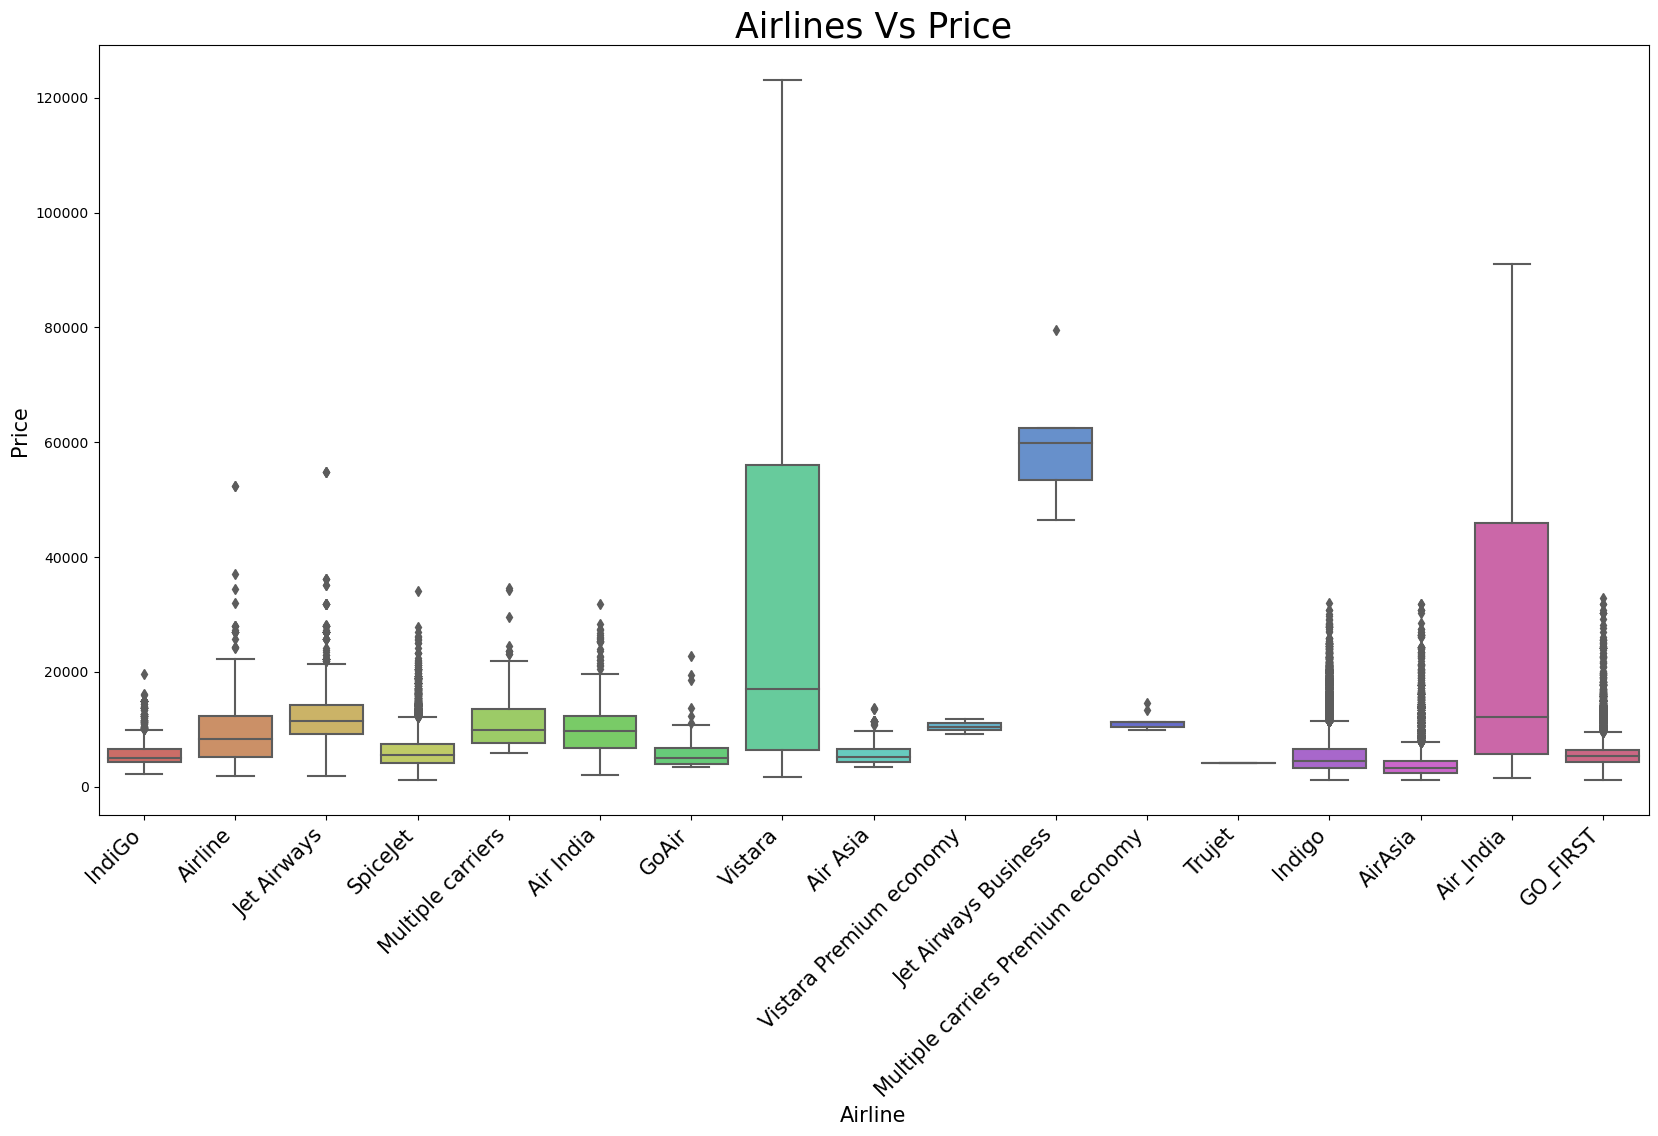

In [50]:
plt.figure(figsize=(20,10))
sns.boxplot(x=merged_df['airline'],y=merged_df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=25)
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(rotation=45, ha='right',fontsize=15)
plt.show()

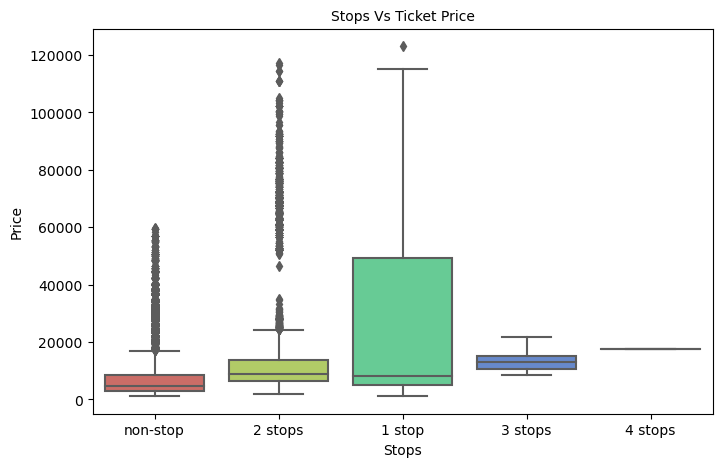

In [51]:
plt.figure(figsize=(8,5))
sns.boxplot(x='specific_stops',y='price',data=merged_df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=10)
plt.xlabel('Stops',fontsize=10)
plt.ylabel('Price',fontsize=10)
plt.show()

In [55]:
dep_price_summary = merged_df.groupby('departure_time')['price'].mean().reset_index()
arrival_price_summary = merged_df.groupby('arrival_time')['price'].mean().reset_index()
dep_price_summary

,departure_time,price
0,Afternoon,18154.030833
1,Early_Morning,20673.544127
2,Evening,21389.796569
3,Late_Night,9790.850660
4,Morning,21314.793208
5,Night,23528.621631


In [56]:
arrival_price_summary

,arrival_time,price
0,Afternoon,18479.499182
1,Early_Morning,14751.159115
2,Evening,22694.560087
3,Late_Night,11518.497220
4,Morning,22288.855307
5,Night,22206.931956


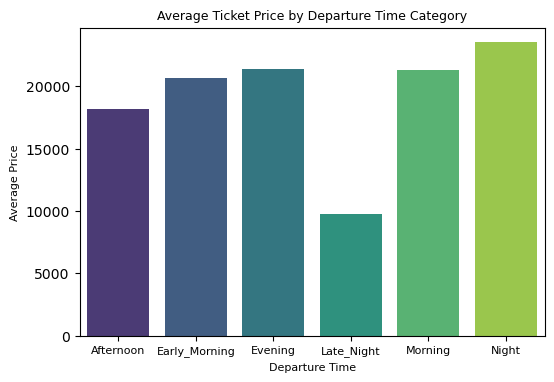

In [59]:
# How the Ticket Price change based on the Departure Time?
plt.figure(figsize=(6, 4))
sns.barplot(x='departure_time', y='price', data=dep_price_summary, palette='viridis')
plt.title('Average Ticket Price by Departure Time Category',fontsize=9)
plt.xlabel('Departure Time',fontsize=8)
plt.ylabel('Average Price',fontsize=8)
plt.xticks(fontsize=8)
plt.show()

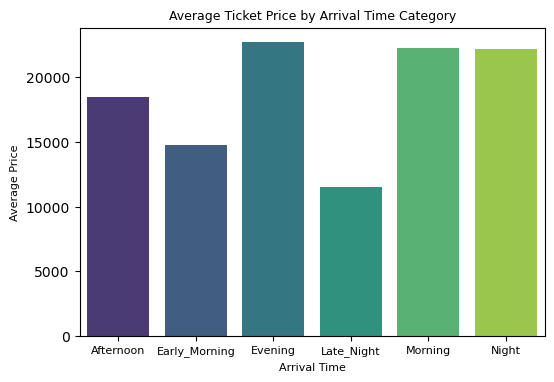

In [61]:
# How the Ticket Price change based on the Arrival Time?
plt.figure(figsize=(6, 4))
sns.barplot(x='arrival_time', y='price', data=arrival_price_summary, palette='viridis')
plt.title('Average Ticket Price by Arrival Time Category',fontsize=9)
plt.xlabel('Arrival Time',fontsize=8)
plt.ylabel('Average Price',fontsize=8)
plt.xticks(fontsize=8)
plt.show()

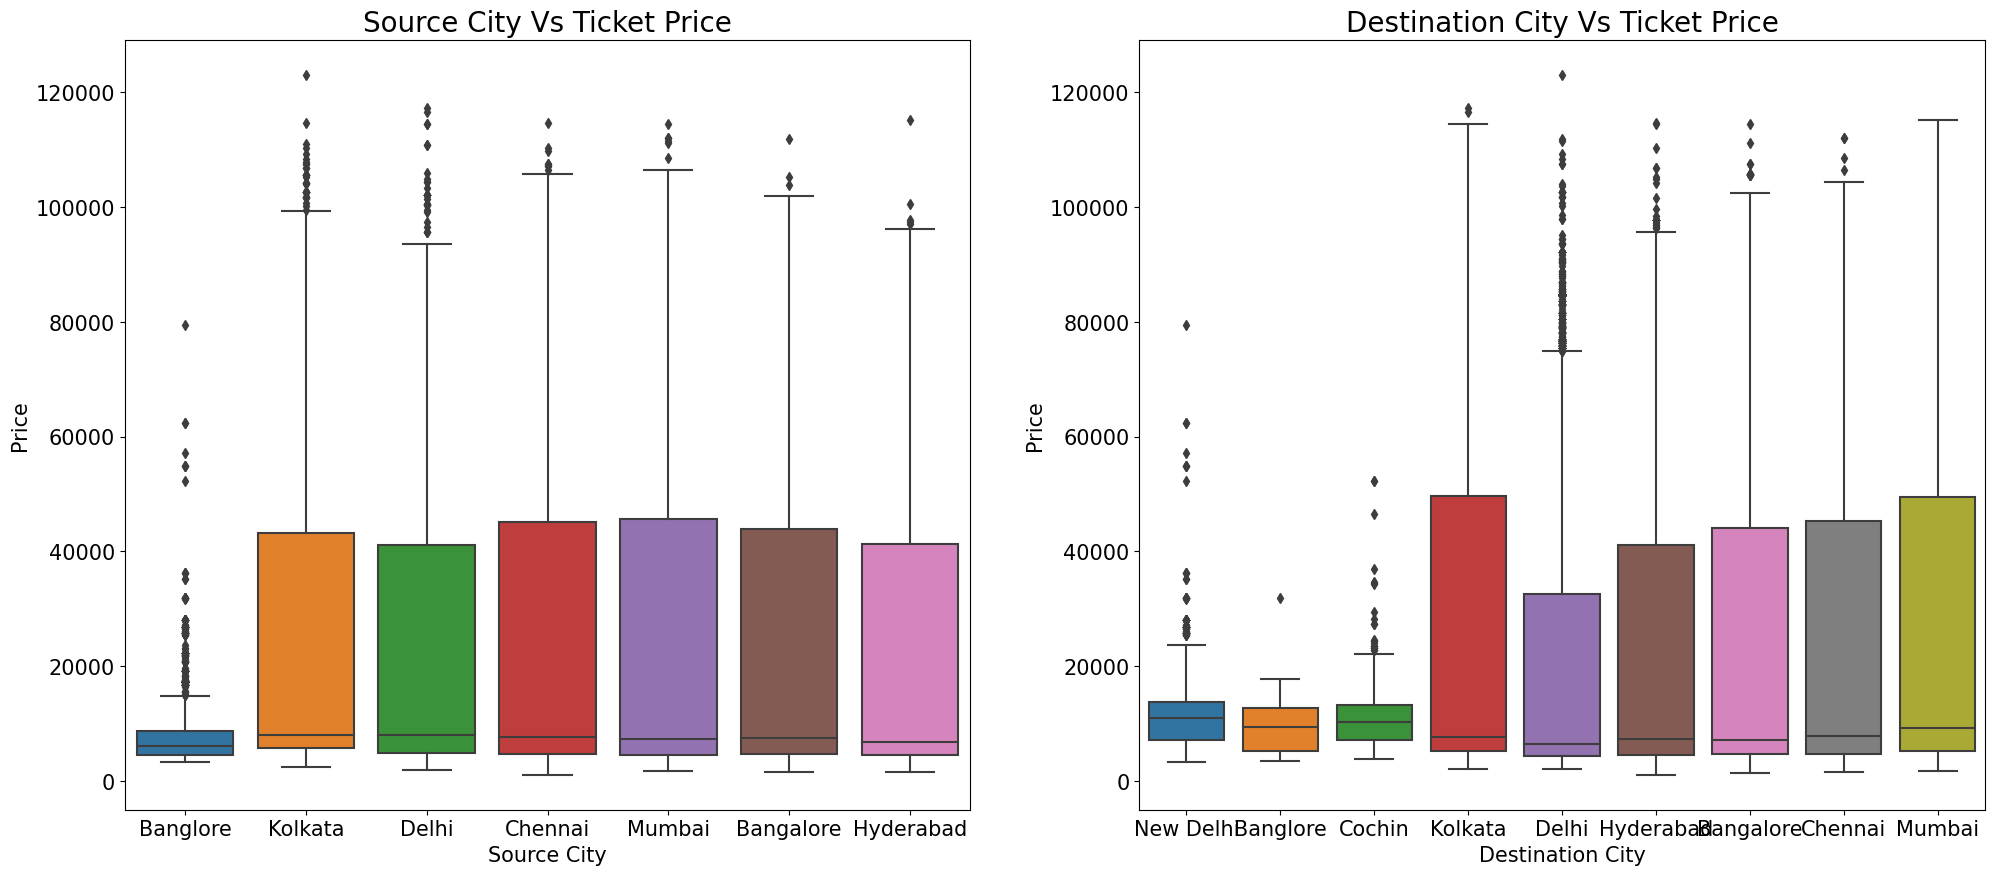

In [70]:
# How the price changes with change in Source city and Destination city? 
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=merged_df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=merged_df)
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [82]:
duration_minute=merged_df['duration']*60
duration_minute

0          150.0
1          435.0
2         1140.0
3          315.0
4          267.0
           ...  
300148     604.8
300149     625.2
300150     829.8
300151     600.0
300152     604.8
Name: duration, Length: 300153, dtype: float64

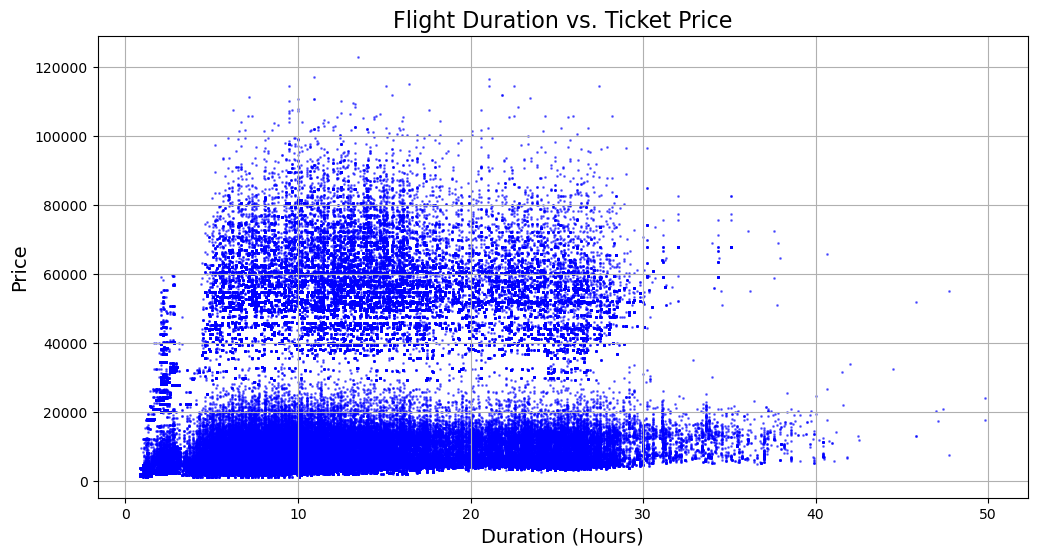

In [98]:
plt.figure(figsize=(12, 6))
plt.scatter(merged_df['duration'], merged_df['price'], alpha=0.5, color='blue',s=1)

# Add titles and labels
plt.title('Flight Duration vs. Ticket Price', fontsize=16)
plt.xlabel('Duration (Hours)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

In [88]:
# Correlation Analysis
correlation = merged_df['duration'].corr(merged_df['price'])
print(f"Correlation between Duration and Price: {correlation:.2f}")

Correlation between Duration and Price: 0.20
